In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

In [ ]:

# Load the dataset (already space-separated and formatted correctly)
file_path = "/content/drive/MyDrive/housing.csv"
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX",
    "PTRATIO", "B", "LSTAT", "Price"  # 'Price' is the target variable
]
df = pd.read_csv(file_path, delim_whitespace=True, names=column_names)

In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=["Price"])
y = df["Price"]

In [ ]:
# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

In [ ]:
# Evaluate Linear Regression Model
mae = mean_absolute_error(y_test, y_pred_linear)
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)
print(f"Linear Regression Results:\nMAE: {mae:.2f}\nMSE: {mse:.2f}\nR-squared: {r2:.2f}")

Linear Regression Results:
MAE: 3.19
MSE: 24.29
R-squared: 0.67


In [ ]:
# Implement Polynomial Regression (Degree=2)
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
# Predict using Polynomial Regression
y_pred_poly = poly_model.predict(X_test)

In [ ]:
# Evaluate Polynomial Regression Model
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"\nPolynomial Regression (Degree={degree}) Results:\nMAE: {mae_poly:.2f}\nMSE: {mse_poly:.2f}\nR-squared: {r2_poly:.2f}")



Polynomial Regression (Degree=2) Results:
MAE: 2.57
MSE: 14.26
R-squared: 0.81


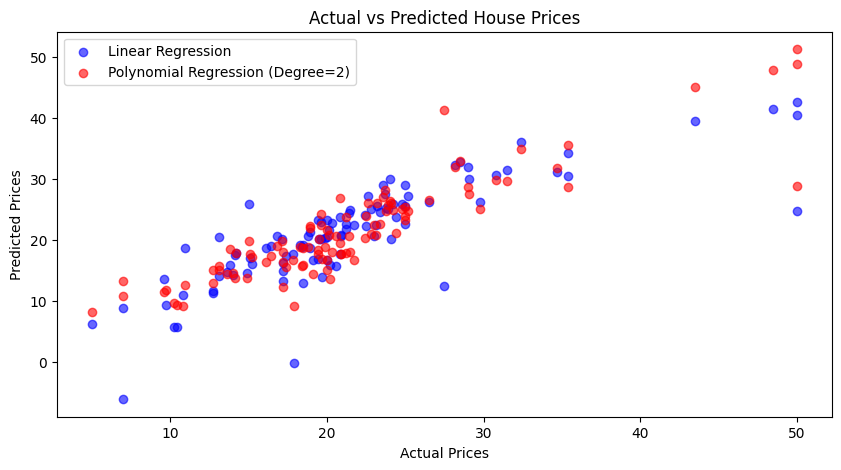

In [ ]:
# Visualization of Actual vs Predicted Prices
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_linear, label="Linear Regression", color="blue", alpha=0.6)
plt.scatter(y_test, y_pred_poly, label=f"Polynomial Regression (Degree={degree})", color="red", alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()